In [12]:
import string
import random
import glob
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
%matplotlib inline

HEIGHT = 80
WIDTH = 600
FONT_SIZE = 32
FONT_FOLDER = "../data/fonts/*"

def generate_dict(all_chars):
    num_chars = len(all_chars)
    
    char2label = dict((char, i) for i, char in enumerate(all_chars))
    label2char = dict((i, char) for i, char in enumerate(all_chars))
    
    return char2label, label2char
    

def generate_strings_in_batch(all_chars, batch_size, length, variance=0):
    char2label, label2char = generate_dict(all_chars)
    
    strings = []
    labels = []
    
    for i in range(batch_size):
        # rand = random.random()
        the_length = length + np.random.randint(-variance, variance+1)
        the_string = "".join([random.choice(all_chars[:len(all_chars)]) for _ in range(the_length)])
        print(f"{the_length}: {the_string}")
        
        the_label = [char2label[char] for char in the_string]
        strings.append(the_string)
        labels.append(np.array(the_label))
        
    return strings, labels

def create_image(size, message, font):
    width, height = size
    image = Image.new('RGB', size, 'white')
    draw = ImageDraw.Draw(image)
    w, h = font.getsize(message)
    # print(w)
    draw.text(((width-w)/2, (height-h)/2), message, font=font, fill='black')
    return image

def get_random_font_from_folder(path=FONT_FOLDER):
    font_files = glob.glob(path)
    font_file = random.choice(font_files)
    font = ImageFont.truetype(font_file, FONT_SIZE)
    
    return font

def generate_images_from_strings(strings):
    font = get_random_font_from_folder()
    images = []
    for word in strings:
        pil_img = create_image((WIDTH, HEIGHT), word, font)
        images.append(pil_img)
        
    return images

In [13]:
all_chars = "0123456789AB"
strings, labels = generate_strings_in_batch(all_chars, 10, 14, 2)

13: 0B6B90398828A
15: 3A101616850174A
12: 1310A6377101
15: 9589031A076678A
14: 295695B48A5126
14: 03BA12A62459A3
12: 098B310B071B
16: 8345244991699366
14: 0965B89B034495
14: 251A8AB4109433


In [14]:
print(generate_dict(all_chars))
print(strings)
print(labels)

({'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11}, {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B'})
['0B6B90398828A', '3A101616850174A', '1310A6377101', '9589031A076678A', '295695B48A5126', '03BA12A62459A3', '098B310B071B', '8345244991699366', '0965B89B034495', '251A8AB4109433']
[array([ 0, 11,  6, 11,  9,  0,  3,  9,  8,  8,  2,  8, 10]), array([ 3, 10,  1,  0,  1,  6,  1,  6,  8,  5,  0,  1,  7,  4, 10]), array([ 1,  3,  1,  0, 10,  6,  3,  7,  7,  1,  0,  1]), array([ 9,  5,  8,  9,  0,  3,  1, 10,  0,  7,  6,  6,  7,  8, 10]), array([ 2,  9,  5,  6,  9,  5, 11,  4,  8, 10,  5,  1,  2,  6]), array([ 0,  3, 11, 10,  1,  2, 10,  6,  2,  4,  5,  9, 10,  3]), array([ 0,  9,  8, 11,  3,  1,  0, 11,  0,  7,  1, 11]), array([8, 3, 4, 5, 2, 4, 4, 9, 9, 1, 6, 9, 9, 3, 6, 6]), array([ 0,  9,  6,  5, 11,  8,  9, 11,  0,  3,  4,  4,  9,  5]), array([ 2,  5,  1, 10,  8, 10, 11,  4,  1,  0,  9,  4

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:45: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.


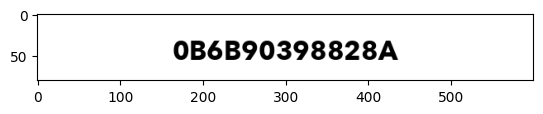

In [15]:
all_img = generate_images_from_strings(strings)

plt.imshow(all_img[0])

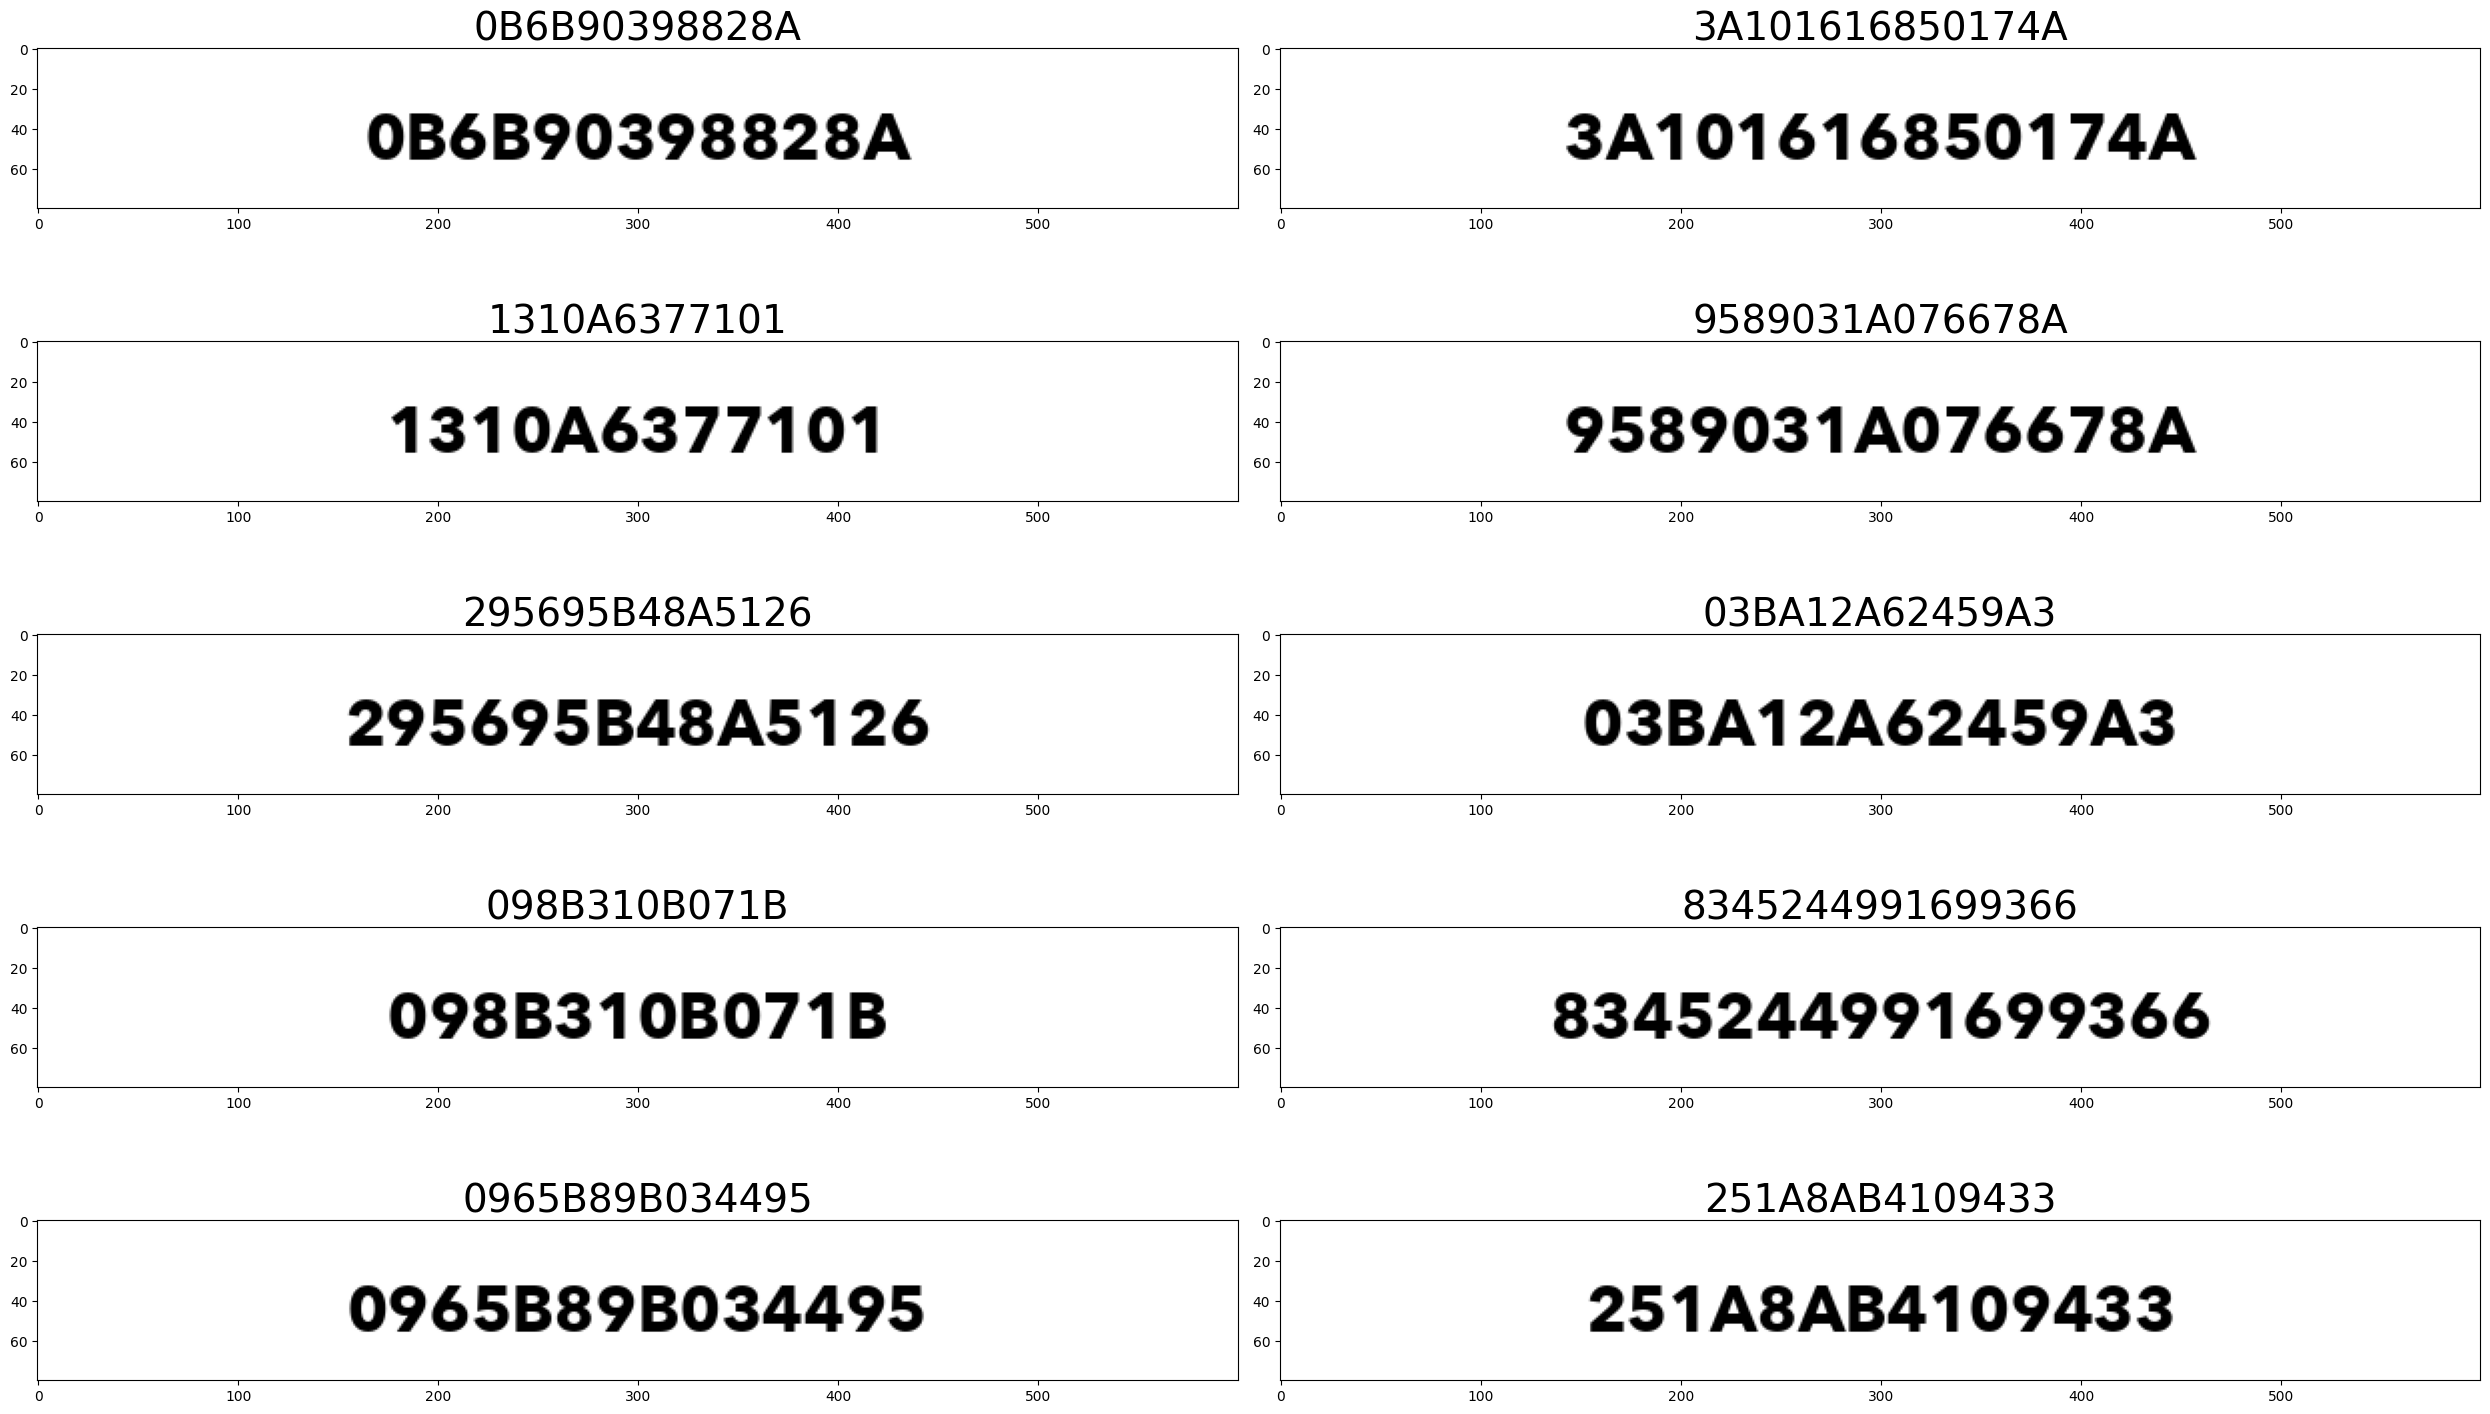

In [17]:
def show_img_and_text(images, text, ncols, nrows, figsize=(25,15)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(text[i], fontsize=28)

    plt.tight_layout()
    

show_img_and_text(all_img, strings, 2, 5)